In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
np.set_printoptions(linewidth=130)

### Load Data

In [15]:
data = np.loadtxt("whData.dat", dtype=object, comments="#", delimiter=None)
w = data[:,0].astype(float)
h = data[:,1].astype(float)
h, w

(array([186., 176., 158., 180., 186., 168., 168., 164., 178., 170., 189., 195., 172., 187., 180., 186., 185., 168., 179., 178.,
        183., 179., 170., 175., 186., 159., 161., 178., 175., 185., 175., 162., 173., 172., 177., 175., 172., 177., 180.]),
 array([ -1.,  60.,  45.,  58.,  70.,  70.,  60.,  64.,  68.,  78.,  80.,  78.,  66.,  74.,  84.,  85.,  75.,  60.,  71.,  67.,
         88.,  -1.,  70.,  60.,  92.,  53.,  61.,  78., 100., 100.,  79.,  62.,  87.,  69.,  61.,  90.,  90.,  80., 100.]))

### 2.1.1 Pre-Processing

In [16]:
# select all valid indices and extract them from the vectors
inliers = w > 0

# leaving the outliers out - pun intended
h = h[inliers]
w = w[inliers]

h, w

(array([176., 158., 180., 186., 168., 168., 164., 178., 170., 189., 195., 172., 187., 180., 186., 185., 168., 179., 178., 183.,
        170., 175., 186., 159., 161., 178., 175., 185., 175., 162., 173., 172., 177., 175., 172., 177., 180.]),
 array([ 60.,  45.,  58.,  70.,  70.,  60.,  64.,  68.,  78.,  80.,  78.,  66.,  74.,  84.,  85.,  75.,  60.,  71.,  67.,  88.,
         70.,  60.,  92.,  53.,  61.,  78., 100., 100.,  79.,  62.,  87.,  69.,  61.,  90.,  90.,  80., 100.]))

In [17]:
# combine the two attributes into a data-matrix
# rows are features, columns become measurements
X = np.stack([h, w])
F, N = X.shape
X.shape

(2, 37)

### Task 2.1.2 Model Fitting

In [18]:
µ = np.mean(X, axis=1, keepdims=True)
µ

array([[175.72972973],
       [ 73.86486486]])

In [19]:
S = np.cov(X - µ, ddof=1) # ddof = degree of freedom = scales with 1/(n-1)
S

array([[ 75.92492492,  64.5457958 ],
       [ 64.5457958 , 186.95345345]])

In [20]:
# verify against given formular
(1 / (N-1)) * (X - µ) @ (X - µ).T

array([[ 75.92492492,  64.5457958 ],
       [ 64.5457958 , 186.95345345]])

### Task 2.1.3 Predictions

In [21]:
def predict(x, µ, S):
    """x, µ have shape [2, 1] and S is [2, 2]"""
    xc = x - µ
    scale = 1 / np.sqrt((2*np.pi)**len(µ) * np.linalg.det(S))
    G = xc.T @ np.linalg.inv(S) @ xc
    return scale * np.exp(-0.5 * G).item()

In [22]:
# %%timeit
W = np.linspace(40, 110, num=100)
H = np.linspace(150, 200, num=100)

# Some say vectorize that
# Some say premature optimzation is the root of all evil
# ¯\_(ツ)_/¯
P = [[predict(np.array([[h], [w]]), µ, S) for w in W] for h in H]

In [27]:
import os
os.getcwd()

from pathlib import Path
(Path() / "slides/images").exists()

True

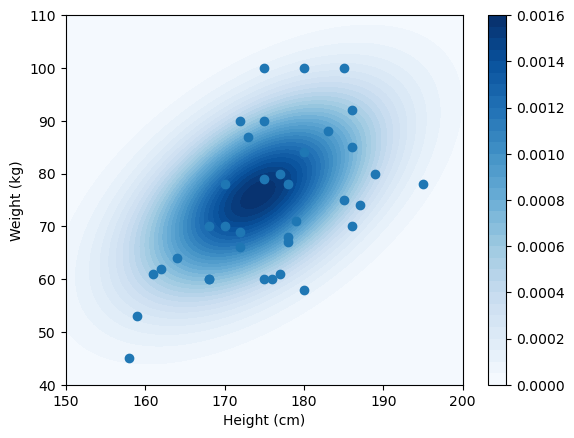

In [28]:
con = plt.contourf(*np.meshgrid(H, W), np.array(P), 33, cmap="Blues")
plt.colorbar()
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.scatter(*X)
plt.savefig("slides/images/gaussian.png")

### Task 2.1.3

Condition and predict (aka calculate the mean of the remaining distribution for conditioning)

In [62]:
# example with h = 175
µw = µ[1] + S[1, 0] * S[0, 0]**(-1) * (h - µ[0])
µw

array([[73.24450223]])

In [29]:
Sw = S[1, 1] - S[1, 0] * S[0, 0]**(-1) * S[0, 1]
Sw

132.0813576425969

In [30]:
data = defaultdict(list)
for h in np.arange(140, 220, step=10):
    µw = µ[1] + S[1, 0] * S[0, 0]**(-1) * (h - µ[0])
    Sw = S[1, 1] - S[1, 0] * S[0, 0]**(-1) * S[0, 1]
    # print(f"Given height {h=} predict weight {µw.item():.2f} with Covariance={Sw:.2f}")
    data["Height"].append(h)
    data["Weight"].append(µw.item())
    data["Covariance"].append(Sw.item())

In [31]:
pd.DataFrame(data)

,Height,Weight,Covariance
0,140,43.490072,132.081358
1,150,51.991338,132.081358
2,160,60.492604,132.081358
3,170,68.993869,132.081358
4,180,77.495135,132.081358
5,190,85.996401,132.081358
6,200,94.497666,132.081358
7,210,102.998932,132.081358
